In [1]:
#Import the necessary libraries
import os
import warnings
import numpy as np
import getData as gD
from sklearn import metrics
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")
from keras.optimizers import Adam
from keras.utils.np_utils import to_categorical
from sklearn.model_selection import train_test_split
from keras import models,layers 

/usr/local/lib/python3.7/site-packages/librosa/util/decorators.py:9: NumbaDeprecationWarning: An import was requested from a module that has moved location.
Import requested from: 'numba.decorators', please update to use 'numba.core.decorators' or pin to Numba version 0.48.0. This alias will not be present in Numba version 0.50.0.
  from numba.decorators import jit as optional_jit
/usr/local/lib/python3.7/site-packages/librosa/util/decorators.py:9: NumbaDeprecationWarning: An import was requested from a module that has moved location.
Import of 'jit' requested from: 'numba.decorators', please update to use 'numba.core.decorators' or pin to Numba version 0.48.0. This alias will not be present in Numba version 0.50.0.
  from numba.decorators import jit as optional_jit
Using TensorFlow backend.


In [2]:
#Get the datasets 
(X,Y) = gD.getDataSet()
m,n = X.shape
nLabels = 10
Y = to_categorical(np.reshape(Y,(len(Y),1)))
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state = 42)
del X,Y #Free up some memory

In [9]:
#Build the model
model = models.Sequential()
model.add(layers.Dense(512,activation = 'relu',input_shape = (n,)))
model.add(layers.Dense(256,activation = 'relu'))
model.add(layers.Dense(10,activation = 'softmax'))
model.compile(loss = 'categorical_crossentropy',metrics = ['accuracy'],optimizer = Adam())
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 512)               20992     
_________________________________________________________________
dense_8 (Dense)              (None, 256)               131328    
_________________________________________________________________
dense_9 (Dense)              (None, 10)                2570      
Total params: 154,890
Trainable params: 154,890
Non-trainable params: 0
_________________________________________________________________


In [10]:
#Train the model and save weights 
from datetime import datetime 
from keras.callbacks import ModelCheckpoint
nEpochs = 72; batchSize = 32
#checkpointer = ModelCheckpoint(filepath = '', verbose=1, save_best_only=True)
start = datetime.now()
history = model.fit(x_train,y_train,epochs = nEpochs,batch_size = batchSize,validation_data = (x_test,y_test),verbose = 2)
duration = datetime.now() - start
print("Training completed in:",duration)    

Train on 6985 samples, validate on 1747 samples
Epoch 1/72
 - 1s - loss: 3.1640 - accuracy: 0.4555 - val_loss: 1.3340 - val_accuracy: 0.5890
Epoch 2/72
 - 1s - loss: 1.2354 - accuracy: 0.6275 - val_loss: 1.2394 - val_accuracy: 0.6108
Epoch 3/72
 - 1s - loss: 1.0682 - accuracy: 0.6817 - val_loss: 0.8531 - val_accuracy: 0.7138
Epoch 4/72
 - 1s - loss: 0.8209 - accuracy: 0.7437 - val_loss: 0.8499 - val_accuracy: 0.7476
Epoch 5/72
 - 1s - loss: 0.7084 - accuracy: 0.7744 - val_loss: 0.9834 - val_accuracy: 0.7064
Epoch 6/72
 - 1s - loss: 0.6490 - accuracy: 0.7881 - val_loss: 0.6902 - val_accuracy: 0.7785
Epoch 7/72
 - 1s - loss: 0.5207 - accuracy: 0.8256 - val_loss: 0.6548 - val_accuracy: 0.8054
Epoch 8/72
 - 1s - loss: 0.4462 - accuracy: 0.8501 - val_loss: 0.5882 - val_accuracy: 0.8363
Epoch 9/72
 - 1s - loss: 0.3983 - accuracy: 0.8679 - val_loss: 0.6269 - val_accuracy: 0.8111
Epoch 10/72
 - 1s - loss: 0.3870 - accuracy: 0.8717 - val_loss: 0.5719 - val_accuracy: 0.8351
Epoch 11/72
 - 1s - l

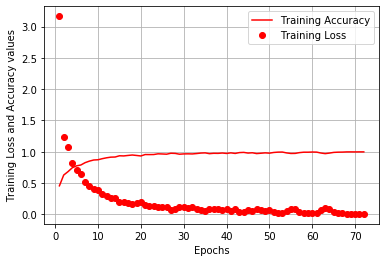

In [11]:
#Plot the models
acc = history.history['accuracy']
loss = history.history['loss']
epochs = range(1,nEpochs+1)
plt.plot(epochs,acc,'r',label = 'Training Accuracy')
plt.plot(epochs,loss,'ro',label = 'Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Training Loss and Accuracy values')
plt.legend(loc = 'best')
plt.grid(True)
plt.show()